In [1]:
import sqlite3
from typing import Dict
from render import * 
import db as database
from jinja2 import Environment, PackageLoader, select_autoescape
import pandas as pd

In [2]:
import importlib

In [3]:
importlib.reload(database)

<module 'db' from '/data/sss/f/tt/Stock/db.py'>

In [2]:
db = sqlite3.connect("stock.db")


In [3]:
db.in_transaction

False

In [4]:
krx = database.GetAllKRXCorp(db)

In [5]:
krxDf = pd.DataFrame([corp.toDict() for corp in krx])

In [6]:
data = GetStockPriceFrom(db,"212310", 61)


In [7]:
s = pd.DataFrame(data, columns=[s for s in database.STOCK_INDEX.__members__.keys()])

In [8]:
s.set_index("DATE", inplace=True)

In [9]:
stock = s

In [10]:
stock

CODE  CLOSE  DIFF  OPEN  HIGH   LOW  VOLUME
DATE                                                     
2023-06-02  212310   2375    75  2205  2615  2205      19
2023-06-01  212310   2300    35  2335  2645  2215      16
2023-05-31  212310   2335     0  2340  2340  2335     145
2023-05-30  212310   2335   190  2275  2790  2275    6245
2023-05-26  212310   2525    30  2450  2780  2420     658
...            ...    ...   ...   ...   ...   ...     ...
2023-03-13  212310   3190   100  3695  3695  2805    2967
2023-03-10  212310   3290    15  3675  3675  3110       9
2023-03-09  212310   3275   205  3800  3800  3220     467
2023-03-08  212310   3480    15  3460  3480  3460     289
2023-03-07  212310   3495   235  3495  3500  3315     125

[61 rows x 7 columns]

In [11]:
close = stock["CLOSE"]
d5 = stock["CLOSE"].iloc[:10].loc[::-1].rolling(window=5
    ).mean().dropna().loc[::-1]
d5

DATE
2023-06-02    2374.0
2023-06-01    2398.0
2023-05-31    2404.0
2023-05-30    2434.0
2023-05-26    2447.0
2023-05-25    2447.0
Name: CLOSE, dtype: float64

In [18]:
dstd5 = close.iloc[:10].loc[::-1].rolling(window=5).std().dropna().loc[::-1]
dstd5

DATE
2023-06-02     88.487287
2023-06-01    103.778611
2023-05-31     97.365292
2023-05-30     93.834962
2023-05-26     80.202868
2023-05-25     80.202868
Name: CLOSE, dtype: float64

In [21]:
d5[[1,2]]

DATE
2023-06-01    2398.0
2023-05-31    2404.0
Name: CLOSE, dtype: float64

In [22]:
import numpy as np



In [51]:
a = 51
arr = np.array([50]* 24 + [a])
m = arr.mean()
std = arr.std(ddof=1)
m, std , m + 2*std, m+2*std < a

(50.04, 0.2, 50.44, True)

In [40]:
(a-50)/5

10.0

In [55]:
krx.__len__() * ((100-95.4499736104)/100)*0.5

59.082092668956086

In [12]:
volume = stock["VOLUME"]
volume

DATE
2023-05-22      27
2023-05-19     403
2023-05-18       1
2023-05-17       5
2023-05-16    3711
              ... 
2023-02-28    1017
2023-02-27     799
2023-02-24      12
2023-02-23     688
2023-02-22       4
Name: VOLUME, Length: 61, dtype: int64

In [17]:
stock.index[0]

'2023-05-22'

In [62]:
biggerThanYesterday = stock["CLOSE"].shift(-1) < stock["CLOSE"]
biggerThanYesterday

DATE
2022-06-03     True
2022-06-02    False
2022-05-31     True
2022-05-30     True
2022-05-27    False
              ...  
2022-03-15    False
2022-03-14    False
2022-03-11     True
2022-03-10     True
2022-03-08    False
Name: CLOSE, Length: 61, dtype: bool

In [63]:
ObvWeight = biggerThanYesterday.map(lambda x: 1 if x else -1)
ObvWeight

In [66]:
factor = volume * ObvWeight
factor

DATE
2022-06-03     175508
2022-06-02    -350113
2022-05-31     276819
2022-05-30     191087
2022-05-27    -392051
               ...   
2022-03-15   -2701677
2022-03-14   -4436719
2022-03-11     997048
2022-03-10    1754702
2022-03-08    -878964
Length: 61, dtype: int64

In [71]:
obv = factor.iloc[::-1].cumsum().iloc[::-1]
obv

DATE
2022-06-03   -1804451
2022-06-02   -1979959
2022-05-31   -1629846
2022-05-30   -1906665
2022-05-27   -2097752
               ...   
2022-03-15   -5265610
2022-03-14   -2563933
2022-03-11    1872786
2022-03-10     875738
2022-03-08    -878964
Length: 61, dtype: int64

In [29]:
close = stock["CLOSE"]
d5 = stock["CLOSE"].loc[::-1].rolling(window=5
    ).mean().dropna().loc[::-1]
d10 = stock["CLOSE"].loc[::-1].rolling(window=10
    ).mean().dropna().loc[::-1]
d20 = stock["CLOSE"].loc[::-1].rolling(window=20
    ).mean().dropna().loc[::-1]
d30 = stock["CLOSE"].loc[::-1].rolling(window=30
    ).mean().dropna().loc[::-1]
d60 = stock["CLOSE"].loc[::-1].rolling(window=60
    ).mean().dropna().loc[::-1]

In [30]:
def isRelativeDiffLessThan(a:pd.Series,b:pd.Series, threshold: float,nday:int) -> bool:
    return (a.iloc[nday] - b.iloc[nday]) / b.iloc[nday] < threshold

In [15]:
def every(f, xs):
    for x in xs:
        if not f(x):
            return False
    return True

In [31]:
a = [d5, d10, d20, d30, d60]
if every(lambda i: isRelativeDiffLessThan(i,close,0.05,0), a):
        print("evert")
print(d5.iloc[0] , close.iloc[0],d5.iloc[0] - close.iloc[0])
(d5.iloc[0] - close.iloc[0]) / close.iloc[0]

evert
6236.0 6290 -54.0


-0.008585055643879173

In [36]:
(d60.iloc[0] - close.iloc[0])/close.iloc[0]

-0.1876921038685744

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

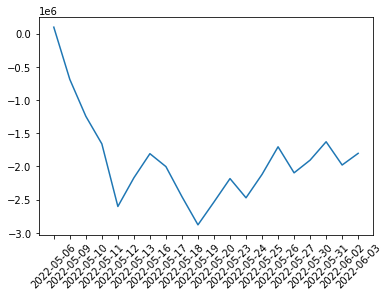

In [73]:
plt.plot(obv.iloc[:20].iloc[::-1])
plt.xticks(rotation = 45)

In [32]:
d5 = stock["CLOSE"].loc[::-1].rolling(window=5
        ).mean().dropna().loc[::-1]
d20 = stock["CLOSE"].loc[::-1].rolling(window=20
        ).mean().dropna().loc[::-1]
d60 = stock["CLOSE"].loc[::-1].rolling(window=60
        ).mean().dropna().loc[::-1]

In [41]:
ewm5 =  stock["CLOSE"].loc[::-1].ewm(span=5).mean().loc[::-1]
ewm10 =  stock["CLOSE"].loc[::-1].ewm(span=10).mean().loc[::-1]
macd = (ewm5 - ewm10)
signal = macd.loc[::-1].ewm(span=4).mean().loc[::-1]

In [48]:
import matplotlib.pyplot as plt

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

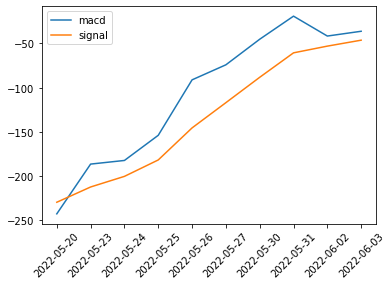

In [51]:
plt.plot(macd.iloc[0:10].iloc[::-1],label="macd")
plt.legend()
plt.plot(signal.iloc[0:10].iloc[::-1],label="signal")
plt.legend()
plt.xticks(rotation=45)

In [17]:
from gen import *

In [16]:
dataStore = DataStore()
krx_corps = dataStore.getAllKRXCorp()

In [18]:
collector = OutputCollector()
prepareCollector(collector)

In [19]:
for corp in tqdm.tqdm(krx_corps):
    for nday in range(0, 5):
        collect(dataStore, collector, corp, nday)
    dataStore.clearCache()

100%|██████████| 2564/2564 [01:10<00:00, 36.62it/s] 


['2022-05-27',
 '2022-06-02',
 '2022-05-31',
 '2022-05-30',
 '2021-04-14',
 '2022-05-04',
 '2022-01-28',
 '2022-05-16',
 '2021-07-05',
 '2022-02-10']